## Imports

In [14]:
# feature extractoring and preprocessing data
import librosa
import librosa.display
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from pathlib import Path
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Reports
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Preprocessing methods


## Reading some audio samples

In [15]:
sr = 16000
e_file1 = 'C:/nmb/nmb_data/testvoice_F2.wav'
e_file2 = 'C:/nmb/nmb_data/testvoice_M2.wav'

# 10 seconds of each file
y1, sr = librosa.load(e_file1, mono=True, sr=sr, offset=0, duration=5)
y2, sr = librosa.load(e_file2, mono=True, sr=sr, offset=0, duration=5)

In [16]:
import sounddevice as sd

sd.play(y1, sr)

In [17]:
import sounddevice as sd

sd.play(y2, sr)

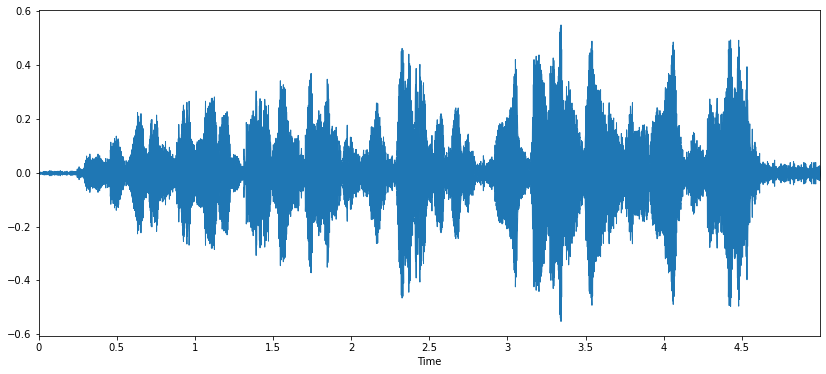

In [18]:
librosa.display.waveplot(y1, sr=sr, x_axis='time')

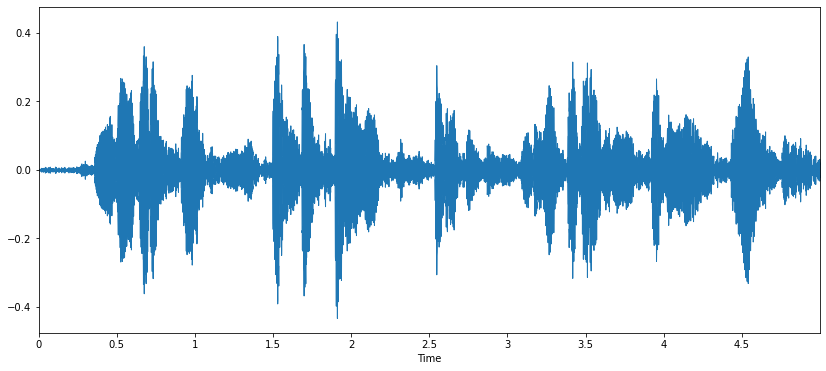

In [19]:
librosa.display.waveplot(y2, sr=sr, x_axis='time')

## Logmel-spectogram

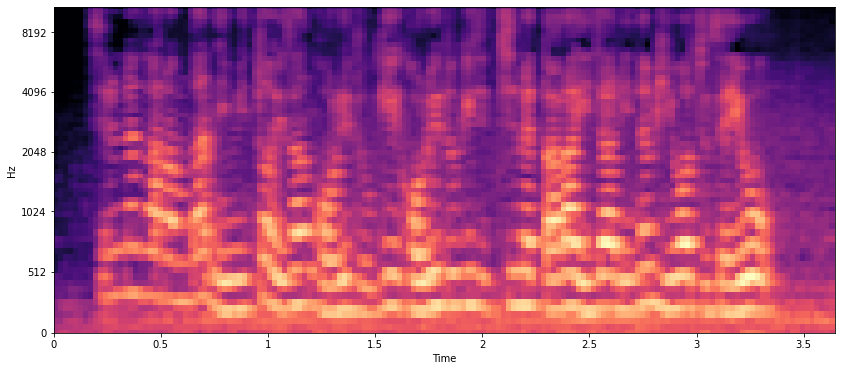

In [20]:
S1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=64)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, x_axis='time', y_axis='mel')

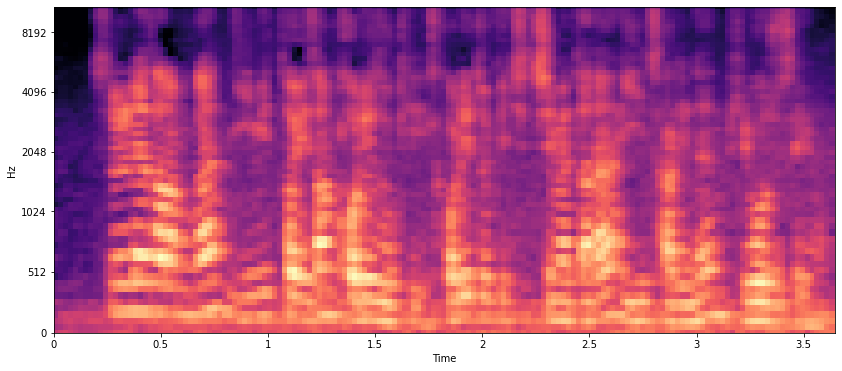

In [21]:
S2 = librosa.feature.melspectrogram(y=y2, sr=sr, n_mels=64)
D2 = librosa.power_to_db(S2, ref=np.max)
librosa.display.specshow(D2, x_axis='time', y_axis='mel')

In [22]:
from scipy import signal
import random

def f_high(y, sr):
    b, a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b, a, y)
    return yf

In [23]:
yf1 = f_high(y1, sr)
yf2 = f_high(y2, sr)

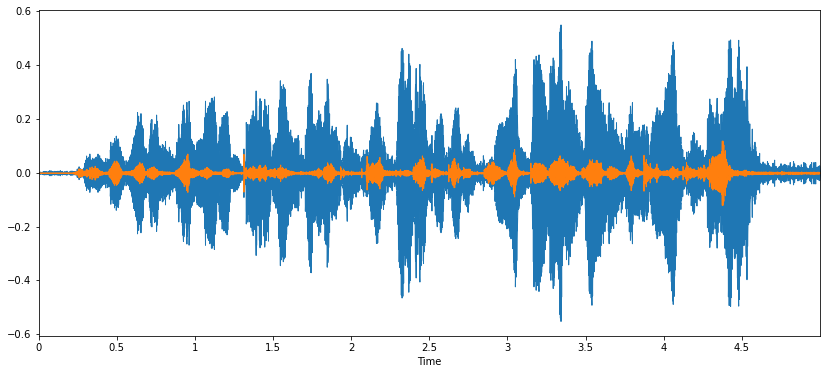

In [24]:
librosa.display.waveplot(y1, sr=sr, x_axis='time')
librosa.display.waveplot(yf1, sr=sr, x_axis='time')

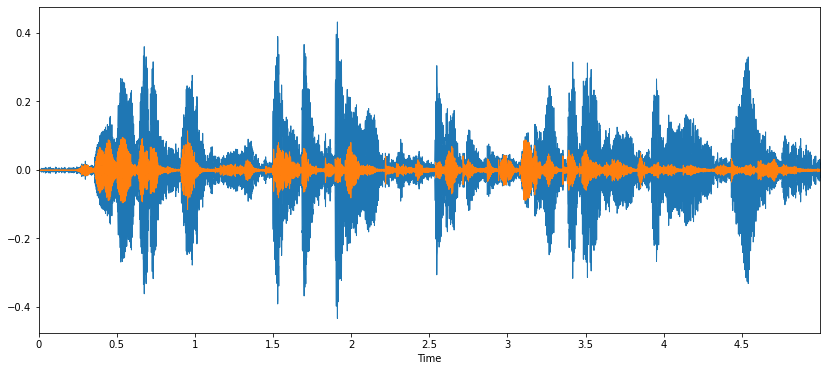

In [25]:
librosa.display.waveplot(y2, sr=sr, x_axis='time')
librosa.display.waveplot(yf2, sr=sr, x_axis='time')

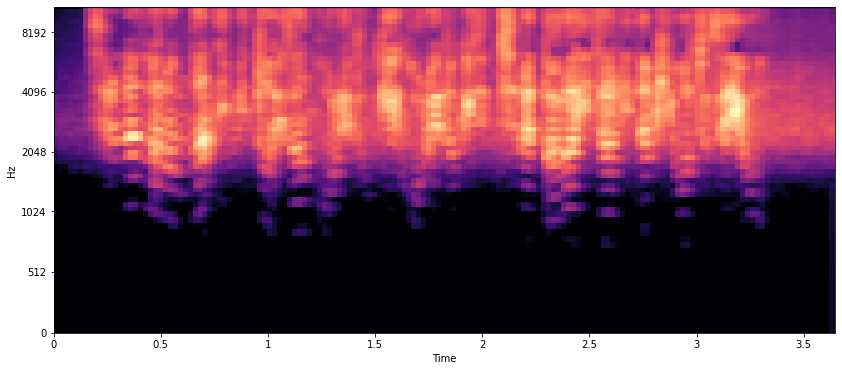

In [26]:
Sf1 = librosa.feature.melspectrogram(y=yf1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel')

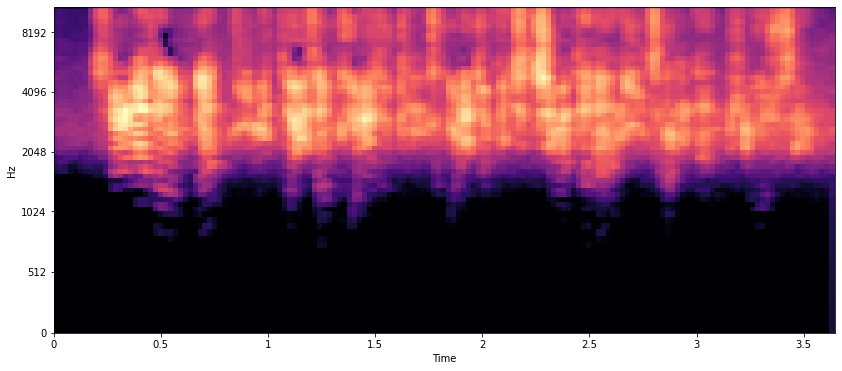

In [27]:
Sf2 = librosa.feature.melspectrogram(y=yf2, sr=sr, n_mels=64)
Df2 = librosa.power_to_db(Sf2, ref=np.max)
librosa.display.specshow(Df2, x_axis='time', y_axis='mel')

In [28]:
import sounddevice as sd

sd.play(yf1, sr)

In [29]:
import sounddevice as sd

sd.play(yf2, sr)

## PCEN

In [30]:
Dp1 = librosa.pcen(S1 * (2**31), sr=sr, gain=1.1, hop_length=512, bias=2, power=0.5, time_constant=0.8, eps=1e-06, max_size=2)
Dp2 = librosa.pcen(S2 * (2**31), sr=sr, gain=1.1, hop_length=152, bias=2, power=0.5,
time_constant=0.8, eps=1e-06, max_axis=2)

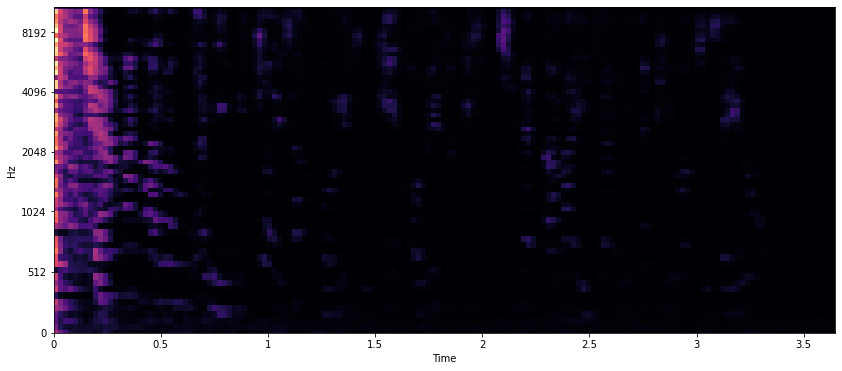

In [31]:
librosa.display.specshow(Dp1, x_axis='time', y_axis='mel')

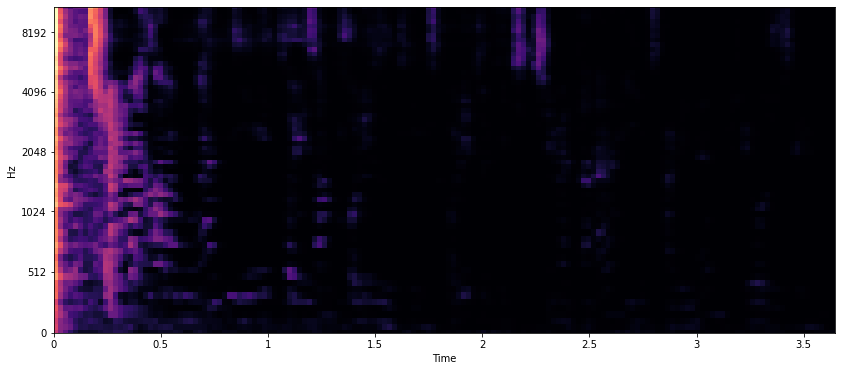

In [32]:
librosa.display.specshow(Dp2, x_axis='time', y_axis='mel')

In [33]:
yp1 = librosa.feature.inverse.mel_to_audio(Dp1)
yp2 = librosa.feature.inverse.mel_to_audio(Dp2)

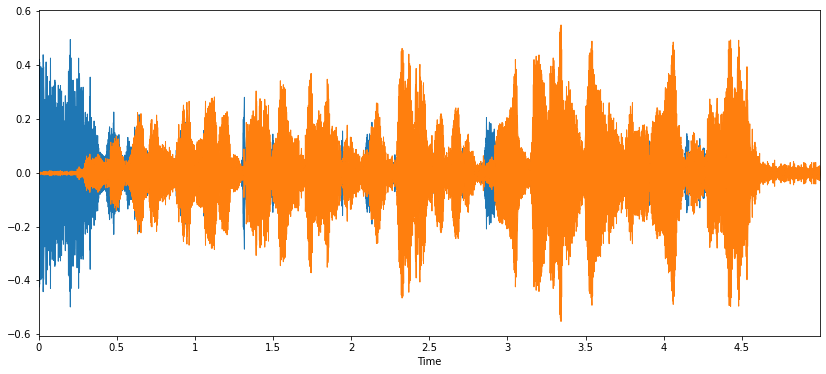

In [34]:
librosa.display.waveplot(yp1, sr=sr, x_axis='time')
librosa.display.waveplot(y1, sr=sr, x_axis='time')

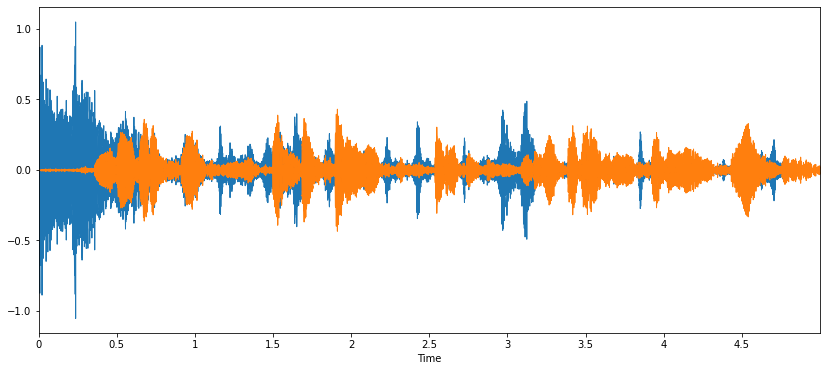

In [35]:
librosa.display.waveplot(yp2, sr=sr, x_axis='time')
librosa.display.waveplot(y2, sr=sr, x_axis='time')

In [36]:
import sounddevice as sd

sd.play(yp1, sr)

In [37]:
import sounddevice as sd

sd.play(yp2, sr)